<a href="https://colab.research.google.com/github/dataeducator/capstone/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final Project Submission:Capstone
(Capstone)

- Student Name: Tenicka Norwood
- Program Pace: self-paced
- Scheduled Project Review Time: Tuesday, September 19, 2023, 12 pm
- Instructor name: Morgan Jones
- Blog post Url: https://medium.com/mlearning-ai/fueling-student-success-1723abd2991b

In this project I will be using __CRISP-DM__ process which has six phases:

* Business Understanding __&#8594;__ Understanding the project objectives, requirements, and constraints from a business perspective.

* Data Understanding __&#8594;__ Exploring and assessing the available data, its quality, structure, and initial insights.

* Data Preparation __&#8594;__ Cleaning, transforming, and preparing the data to be used for modeling, including handling missing values and outliers.

* Modeling __&#8594;__ Selecting and applying appropriate machine learning algorithms or techniques to build predictive or descriptive models.

* Evaluation __&#8594;__ Assessing the performance of the models and determining their suitability for solving the business problem.

* Deployment __&#8594;__ Integrating the chosen model into the business environment, making it accessible for end-users.

## Business Understanding

---





#### __Disclaimer:__
This Jupyter notebook and its contents are __intended solely for educational purposes__. The included business case and the results of the deep learning models should not be interpreted as medical advice, and have not received endorsement or approval from any professional or medical organization.

The models and outcomes presented here are for illustrative purposes __only__. Users should __not__ use these models or their outcomes for making real-world decisions without consulting appropriate domain experts and medical professionals. Any actions taken based on the information in this notebook are at the user's own risk. The dataset may not be fully representative of real-world clinical scenarios and should be used with caution in clinical decision-making. Always consult a qualified healthcare professional for medical advice and treatment.
The author and contributors of this notebook disclaim any liability for the accuracy, completeness, or efficacy of the information provided.

#### __Overview:__

The primary objective of this project is to develop a robust predictive model that is capable of accurately identifying individuals at high risk of heart failure based on demographic and clinal data. By harnessing the power of machine learning, Zephyr Healthcare Solutionss aims to signifantly improve patient hospitalizations, and ehannce overal quality of their cardiac care.

#### __Objectives and Goals:__
Zephyr's objective is to leverage machine learning models including optimized neural network based models for precise heart disease detection, aligning within our commitment to advancing diagnostic accuracy and patient care.

#### __Problem Statement:__
In the realm diagnostics, timely and accurate diseease detection is crucial to improving patient health outcomes. Zephyr Healthcare recognizes the potential of machine learning techniques in achieving this goal. The challenge lies in developing a robust predictive model that harnesses the power of neural networks or ensemble methods to identify cardiac conditions with a focus on achieving high recall rates.

#### __Stakeholder:__
Zephyr Healthcare Solutions

#### __Business Case:__  
As a newly appointed lead of the data analytics team at Zephyr Healthcare Solutions,my team has been tasked with enhancing the company's diagnostic capabilities through advanced predictive modeling techniques.

#### __Success Criteria:__
We will prioritize recall in this project over accuracy. We will also aim for balance between recall (sensitivity) while maintaining a high level of precision (specificity). With these objectives in mind, we aim to reduce the number of false positives and increase the model's ability to correctly identify patients with pneumonia. In this context, false positives could lead to unnecessary treatment or interventions.


* __True Positives (TP)__: This represents the number of instances that the model correctly predicted that a person is at risk for heart disease.

* __True Negatives (TN):__ This represents the number of instances that the model correctly predicted that a person is not at risk for heart disease.

* __False Positives (FP):__ This represents the number of instances where the model incorrectly predicted that a person is at risk for heart disease, when they are not at risk.

* __False Negatives (FN):__ This represents the numbeer of instances where the model incorrectly is not at risk for heart disease, when they are at risk.

<br>
\begin{gathered}   
Precision =  \frac{True\ Positive}{True\ Positive + False\ Positive}
\end{gathered}
<br>

</br>

</br>
\begin{gathered}
Recall = \frac{True\ Positive}{False\ Negative + True\ Positive}
\end{gathered}
<br>

A high precision indicates that when our model predicts the presence of a tumor, the patient will likely have a tumor.
<br>

## Data Understanding

---
### Data Exploration
#### __Obtaining  Dataset for Prediction with Machine  Learning__
1. __Create or Log in to Your Kaggle Account:__
    If you do not already have a Kaggle account, create one. If you have an account log in.
2. __Access Your Account Settings:__
  - Click on your profile picture in the top right corner of the Kaggle website.
  - Select __`Account`__ from the dropdown menu.
    
3. __Navigate to the API Section:__
  - Scroll down to the __`API`__ section on the account page.

4. __Create New API Token:__
  - Click on the __`Create New API Token`__ button. This will trigger the download of a file named `kaggle.json`.
5. __Move API Token to Google Drive(We will be using Google Colab)__
 - We will be using Gogle Colab. Please upload the `kaggle.json` file to a folder called kaggle your Gogle Drive. This will allow you to access the Kaggle API from your Colab notebooks.



In [1]:
# Mount your Google Drive to '/content/drive'
from google.colab import drive
drive.mount('/content/drive')

# Create a directory name '.kaggle' in the root directory
!mkdir /root/.kaggle

# Copy the 'kaggle.json' file from the specified location in Google Drive to the kaggle directory
# !cp /content/drive/MyDrive/your_folder_name/kaggle.json
!cp /content/drive/MyDrive/kaggle/kaggle.json /root/.kaggle/kaggle.json

# Set permissions to protect your API key and only the owner can use the credentials held within your json file
!chmod 600 /root/.kaggle/kaggle.json

# Download the dataset 'heart-failure-predition' using the Kaggle API
!kaggle datasets download -d fedesoriano/heart-failure-prediction

# Unzip the downloaded dataset and place it in the specified location in Google Drive
!unzip heart-failure-prediction.zip -d /content/drive/MyDrive/kaggle/heart-failure-prediction



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
mkdir: cannot create directory ‘/root/.kaggle’: File exists
heart-failure-prediction.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  heart-failure-prediction.zip
replace /content/drive/MyDrive/kaggle/heart-failure-prediction/heart.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: /content/drive/MyDrive/kaggle/heart-failure-prediction/heart.csv  


In [2]:
# Import libraries and visualization packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import statsmodels.api as sm
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, recall_score
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras import layers, models
from tensorflow.keras.metrics import BinaryAccuracy, Recall
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import tensorflow as tf


import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action ='ignore', category = DeprecationWarning)
warnings.simplefilter(action ='ignore', category = FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning, module="pandas")


# Allow plots to display and be stored inline within a notebook
%matplotlib inline

# Used for working with the z-score
from scipy import stats

# Used for working with long url
from urllib.parse import urlencode

# Set display option to readable format
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Filter warnings from pandas
pd.options.mode.chained_assignment = None

In [3]:
# Check Pandas version
print("Pandas version")
pd.__version__

Pandas version


'1.5.3'

In [4]:
# Check Numpy version
print("Numpy version")
np.__version__

Numpy version


'1.23.5'

In [5]:
# Check Seaborn version
print("Seaborn version")
sns.__version__

Seaborn version


'0.12.2'

In [6]:
# Check Tensorflow version
print("Tensorflow version")
tf.__version__

Tensorflow version


'2.12.0'

#### __Display basic statistics__


In [7]:
import os
print(os.getcwd())
file_path= f'/content/drive/MyDrive/kaggle/heart-failure-prediction/'
#df = pd.read_csv('content/drive/MyDrive/kaggle/heart-failure-prediction/heart.csv')
os.chdir(file_path);
print(os.getcwd())
df = pd.read_csv('heart.csv');
df.head()

/content
/content/drive/MyDrive/kaggle/heart-failure-prediction


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.00,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.00,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.00,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.50,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.00,Up,0


#### __Check for missing values__



In [8]:
class ScrubData:
    def __init__(self, data):
        """
        Constructor for the ScrubData class.

        Parameters:
        - data (pandas DataFrame): The dataset to be explored

        Initializes the data attribute.
        """

        self.data = data


    def check_placeholders(self):
        """
        Checks and displays the presence of placeholders throughout the entire dataframe.
        Placeholders checked: '?', '#', 'NaN','null, 'N/A,'-'.
        """
        placeholders = ['?', '#', 'NaN', 'null', 'N/A', '-']
        placeholder_mask = self.data.isin(placeholders)

        if placeholder_mask.any().any():
            print('\nPlaceholders Detected:')
            display(placeholder_mask)
        else:
            print('\nNo Placeholders Detected.')

    def clean(self):
        """
        Perform data cleaning operations.
        """
        cleaned_data = self.data.dropna() # Drop rows with missing data

        return cleaned_data

In [9]:
# Create an instance of the "ScrubData" class and pass the obtained dataset as a parameter to initialize the class
scrubbed_data = ScrubData(data = df)

# Clean the dataset using the "clean" method of the "ScrubData" class and store the cleaned data in the variable "cleaned_data".
cleaned_data = scrubbed_data.clean()


In [48]:
class ExploreData:
    def __init__(self,data):
        """
        Constructor for the ExploreData class.

        Parameters:
        - data (pandas DataFrame): The dataset to be explored.

        Initializes the data attribute
        """
        self.data = data

    def examine_structure(self):
        """
        Prints the shape of the dataset and displays the first few rows.
        Also displays the data information including the number of rows and columns in the dataset.
        """
        print('Data Shape:')
        display(self.data.shape)

        print('Data Structure:')
        display(self.data.head())

        print('\nData Information:')
        display(self.data.info())

        print('\nData Statistics:')
        display(self.data.describe())

        print('\nData Columns with Missing Values:')
        display(self.data.isnull().sum())

    def data_duplicated(self):
        """
        Checks and displays the number of duplicate rows in the dataset.
        """
    def check_duplicates(self):

        """
        Checks and displays the number of duplicate rows in the dataset.
        """
        num_duplicates = self.data_duplicated().sum()
        print (f'\nNumber of Duplicate Rows: {num_duplicates}')

    def drop_duplicates(self):
        """
        Drops the duplicate rows from the dataset.
        """
        self.data.drop_duplicates(inplace = True)
        print("Duplicate rows dropped.")

    def generate_correlation_map(self, title):
        """
        Generates and displays a correlation matrix heatmap for the dataset.

        Parameters:
        -title(str): The title of the correlation map
        """

        correlation_matrix = self.data.corr()

        # Create a figure and set the title
        plt.figure(figsize = (30,25))
        plt.suptitle(title)

        # Generate the correlation heatmap
        sns.heatmap(correlation_matrix, annot = True, cmap = 'Blues')

        # Show the correlation map
        plt.show()

    def plot_pairplot(self, correlation_table):
        # Get the columns from the correlation table
        columns = list(correlation_table.index.levels[0])

        # Filter the data based on the columns
        data_filtered = self.data[columns]

        # Create a pairplot using the filtered data
        pairplot = sns.pairplot(data_filtered, diag_kind="kde", markers=".", height=2)

        # Customize the scatter matrix plot
        for ax in pairplot.axes.flat:
            ax.xaxis.label.set_rotation(90)
            ax.yaxis.label.set_rotation(0)
            ax.yaxis.label.set_ha('center')
            ax.get_yaxis().set_label_coords(-0.5, 0.5)
            ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=18)
            ax.set_yticklabels(ax.get_yticklabels(), rotation=90, ha='center', fontsize=18)

        # Show the plot
        plt.tight_layout()
        plt.show()

    def generate_correlation_table(self, threshold_min = 0.6, threshold_max = 1.0):
        """
        Generates a correlation table with filtered correlation pairs within specified thresholds.

        Parameters:
        - threshold_min (float): The minimum threshold for correlation values (inclusive).
                                 Default is 0.6.
        - threshold_max (float): The maximum threshold for correlation values (exclusive).
                                 Default is 1.0.

        Returns:

        - filtered_df (pandas DataFrame): The filtered correlation table.
        """

        correlation_matrix = self.data.corr().abs()

        correlation_df = correlation_matrix.stack().reset_index()
        correlation_df.columns = ['feature1', 'feature2', 'correlation']

        filtered_df = correlation_df[
            (correlation_df['correlation'] > threshold_min) & (correlation_df['correlation'] < threshold_max)
        ]

        filtered_df.drop_duplicates(inplace = True)
        filtered_df.set_index(['feature1', 'feature2'], inplace = True)
        filtered_df.columns = ['correlation']

        return filtered_df

    def plot_sex_distribution(self):
        """
        Plots the Sex distribution from the dataset.
        """
        plt.style.use('fivethirtyeight')
        sex_counts = self.data['Sex'].value_counts()
        sex_labels = ['F', 'M']
        sex_values = [sex_counts[0], sex_counts[1]]

        plt.figure(figsize = (8,6))
        ax = sns.barplot(x = sex_labels, y = sex_values, color = 'blue')

        plt.xlabel('Sex', fontsize = 14, weight = 'bold')
        plt.ylabel('Number of Patients', fontsize = 14, weight = 'bold')
        plt.title('Sex Distribution of Cardiac Patients',fontsize = 18, weight = 'bold')



        plt.show()

    def plot_target_distribution(self):
        """
        Plots the gender distribute of the target variable from the dataset.
        """

        target_data = self.data['HeartDisease']
        target_labels = ['Normal', 'Heart Disease']
        target_values = [target_data[target_data == 0].count(), target_data[target_data == 1].count()]


        plt.figure(figsize = (8,6))
        ax = sns.countplot(x = target_labels, data = target_data, color = 'blue')

        plt.xlabel('Heart Disease', fontsize = 14, weight = 'bold')
        plt.ylabel('Percentage of Patients', fontsize = 14, weight = 'bold')
        plt.title('Number of Patients with Heart Disease',fontsize = 18, weight = 'bold')

        plt.show()

In [42]:
# Create an instance of the ExploreData class and pass the cleaned dataset as a parameter to initialize the class
data_exploration = ExploreData(data=cleaned_data)

# Examine the structure of the dataset, such as the number of rows, columns, data types, and missing values
data_exploration.examine_structure()

Data Shape:


(918, 12)

Data Structure:


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.00,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.00,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.00,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.50,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.00,Up,0



Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


None


Data Statistics:


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.00,918.00,918.00,918.00,918.00,918.00,918.00
mean,53.51,132.40,198.80,0.23,136.81,0.89,0.55
std,9.43,18.51,109.38,0.42,25.46,1.07,0.50
min,28.00,0.00,0.00,0.00,60.00,-2.60,0.00
25%,47.00,120.00,173.25,0.00,120.00,0.00,0.00
50%,54.00,130.00,223.00,0.00,138.00,0.60,1.00
75%,60.00,140.00,267.00,0.00,156.00,1.50,1.00
max,77.00,200.00,603.00,1.00,202.00,6.20,1.00



Data Columns with Missing Values:


Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [43]:
# Generate a correlation table for the cleaned dataset using the "generate_correlation_table" method of the ExploreData class.
# The correlation table will include only correlations between 0.2 and 1.0.
correlation_table = data_exploration.generate_correlation_table(0.2, 1.0)

# Display the correlation table using the "display" function.
display(correlation_table)

correlation
feature1     feature2                 
Age          RestingBP            0.25
             MaxHR                0.38
             Oldpeak              0.26
             HeartDisease         0.28
RestingBP    Age                  0.25
Cholesterol  FastingBS            0.26
             MaxHR                0.24
             HeartDisease         0.23
FastingBS    Cholesterol          0.26
             HeartDisease         0.27
MaxHR        Age                  0.38
             Cholesterol          0.24
             HeartDisease         0.40
Oldpeak      Age                  0.26
             HeartDisease         0.40
HeartDisease Age                  0.28
             Cholesterol          0.23
             FastingBS            0.27
             MaxHR                0.40
             Oldpeak              0.40

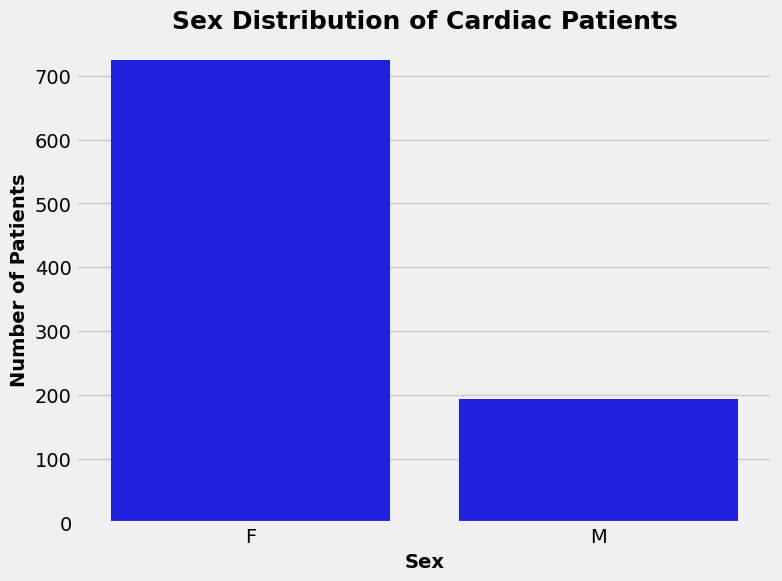

In [44]:
# Plot the gender distribution of the data
data_exploration.plot_sex_distribution()

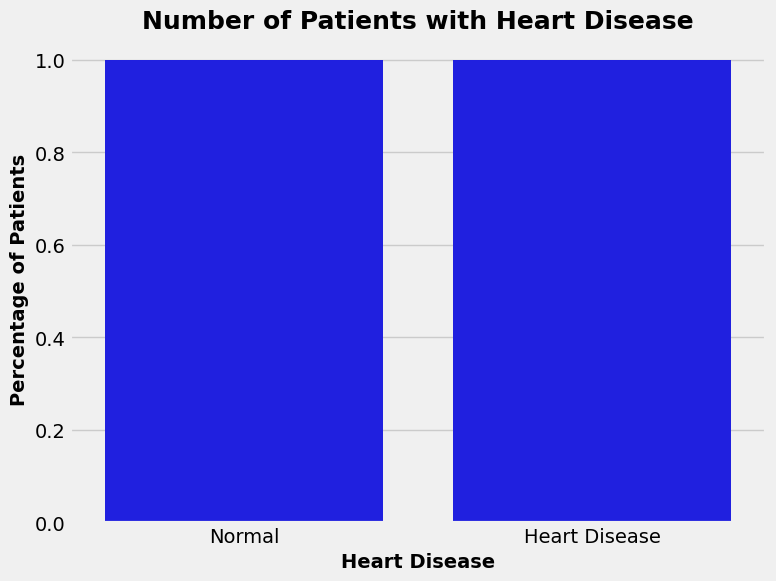

In [45]:
# Plote the Progress to graduation distribution by gender
data_exploration.plot_target_distribution()

In [63]:
class AnalyzeData:
    def __init__(self, data):
        self.data = data

    def analyze(self):
        # Map the revised target variable values to their corresponding labels
        target_labels = {
            0: "No Heart Disease",
            1: "Has Heart Disease"
        }

        # Filter the data for relevant columns
        relevant_columns = ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol',
                            'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina',
                            'Oldpeak', 'ST_Slope', 'HeartDisease']

        data_subset = self.data[relevant_columns]

        data_subset['HeartDisease'] = data_subset['HeartDisease'].map(target_labels)

        # Plot the results
        self.plot_bar_chart(data_subset,
                            'Sex',
                            'Distribution of Heart Disease by Sex',
                            'Number of Patients',
                            'Sex')

        self.plot_heart_disease_by_age(data_subset)
        self.plot_heart_disease_by_chest_pain(data_subset)
        self.plot_heart_disease_by_fasting_bs(data_subset)
        self.plot_heart_disease_by_resting_ecg(data_subset)
        self.plot_heart_disease_by_exercise_angina(data_subset)
        self.plot_heart_disease_by_st_slope(data_subset)

    def plot_bar_chart(self, data, x, title, xlabel, ylabel):
        plt.figure(figsize=(10, 6))
        ax = sns.countplot(data=data, x=x, hue='HeartDisease', palette='pastel')
        plt.legend(title="Heart Disease")
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.title(title, fontsize=18)

        # Add value counts on the bars
        for p in ax.patches:
            ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width()/2., p.get_height()),
                        ha='center', va='bottom', fontsize=10, color='black', weight='bold')
        plt.show()
        plt.show()

    def plot_heart_disease_by_age(self, data):
        plt.figure(figsize=(10, 6))
        age_bins = pd.cut(data['Age'], bins=[20, 30, 40, 50, 60, 70, 80])
        ax = sns.countplot(data=data, x=age_bins, hue='HeartDisease', palette='pastel')
        plt.legend(title="Heart Disease")
        plt.xlabel('Age Range')
        plt.ylabel('Number of Patients')
        plt.title('Distribution of Heart Disease by Age Range', fontsize=18)
         # Add value counts on the bars
        for p in ax.patches:
            ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width()/2., p.get_height()),
                        ha='center', va='bottom', fontsize=10, color='black', weight='bold')
        plt.show()
        plt.show()

    def plot_heart_disease_by_chest_pain(self, data):
        plt.figure(figsize=(10, 6))
        ax = sns.countplot(data=data, x='ChestPainType', hue='HeartDisease', palette='pastel')
        plt.legend(title="Heart Disease")
        plt.xlabel('Chest Pain Type')
        plt.ylabel('Number of Patients')
        plt.title('Distribution of Heart Disease by Chest Pain Type', fontsize=18)
        # Add value counts on the bars
        for p in ax.patches:
            ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width()/2., p.get_height()),
                        ha='center', va='bottom', fontsize=10, color='black', weight='bold')
        plt.show()
        plt.show()

    def plot_heart_disease_by_fasting_bs(self, data):
        plt.figure(figsize=(10, 6))
        ax = sns.countplot(data=data, x='FastingBS', hue='HeartDisease', palette='pastel')
        plt.legend(title="Heart Disease")
        plt.xlabel('Fasting Blood Sugar (1: > 120 mg/dl, 0: <= 120 mg/dl)')
        plt.ylabel('Number of Patients')
        plt.title('Distribution of Heart Disease by Fasting Blood Sugar', fontsize=18)
        # Add value counts on the bars
        for p in ax.patches:
            ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width()/2., p.get_height()),
                        ha='center', va='bottom', fontsize=10, color='black', weight='bold')
        plt.show()
        plt.show()

    def plot_heart_disease_by_resting_ecg(self, data):
        plt.figure(figsize=(10, 6))
        sns.countplot(data=data, x='RestingECG', hue='HeartDisease', palette='pastel')
        plt.legend(title="Heart Disease")
        plt.xlabel('Resting Electrocardiographic Results')
        plt.ylabel('Number of Patients')
        plt.title('Distribution of Heart Disease by Resting Electrocardiographic Results', fontsize=18)
        plt.show()

    def plot_heart_disease_by_exercise_angina(self, data):
        plt.figure(figsize=(10, 6))
        sns.countplot(data=data, x='ExerciseAngina', hue='HeartDisease', palette='pastel')
        plt.legend(title="Heart Disease")
        plt.xlabel('Exercise Induced Angina (1: Yes, 0: No)')
        plt.ylabel('Number of Patients')
        plt.title('Distribution of Heart Disease by Exercise Induced Angina', fontsize=18)
        plt.show()

    def plot_heart_disease_by_st_slope(self, data):
        plt.figure(figsize=(10, 6))
        sns.countplot(data=data, x='ST_Slope', hue='HeartDisease', palette='pastel')
        plt.legend(title="Heart Disease")
        plt.xlabel('ST Slope')
        plt.ylabel('Number of Patients')
        plt.title('Distribution of Heart Disease by ST Slope', fontsize=18)
        plt.show()

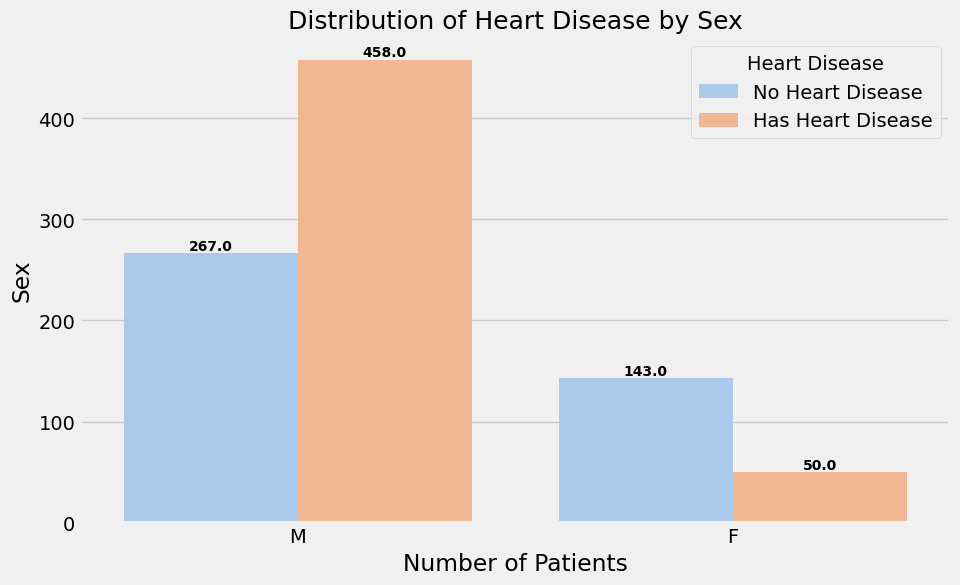

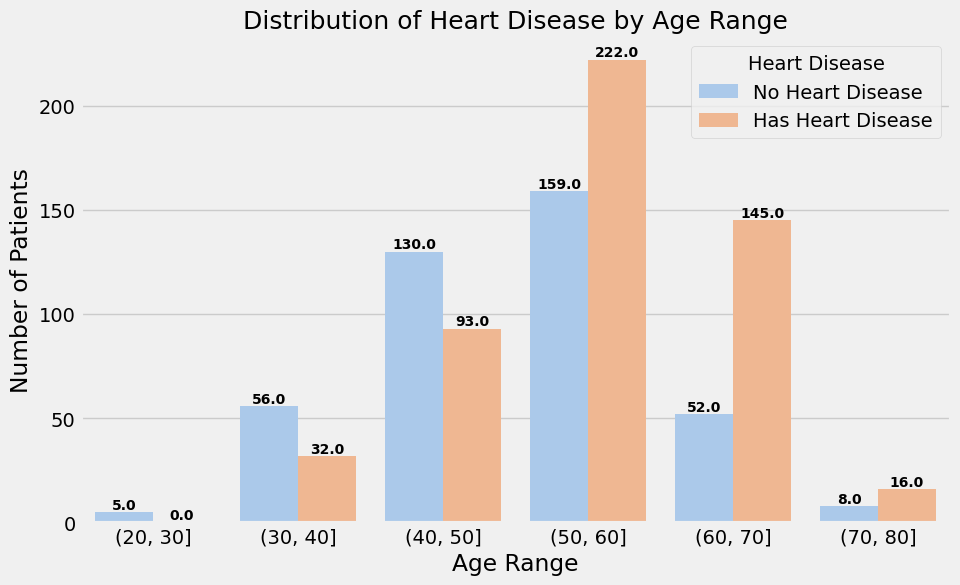

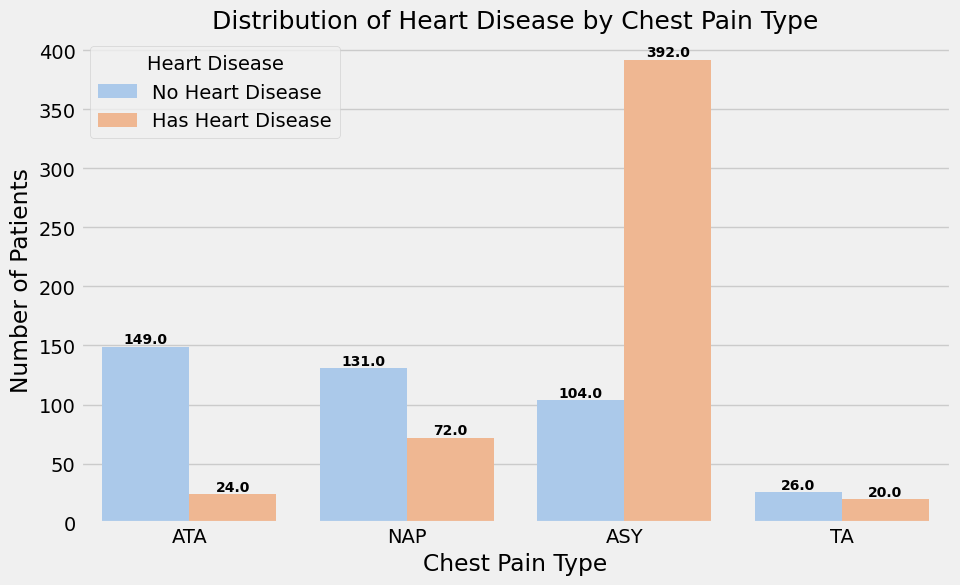

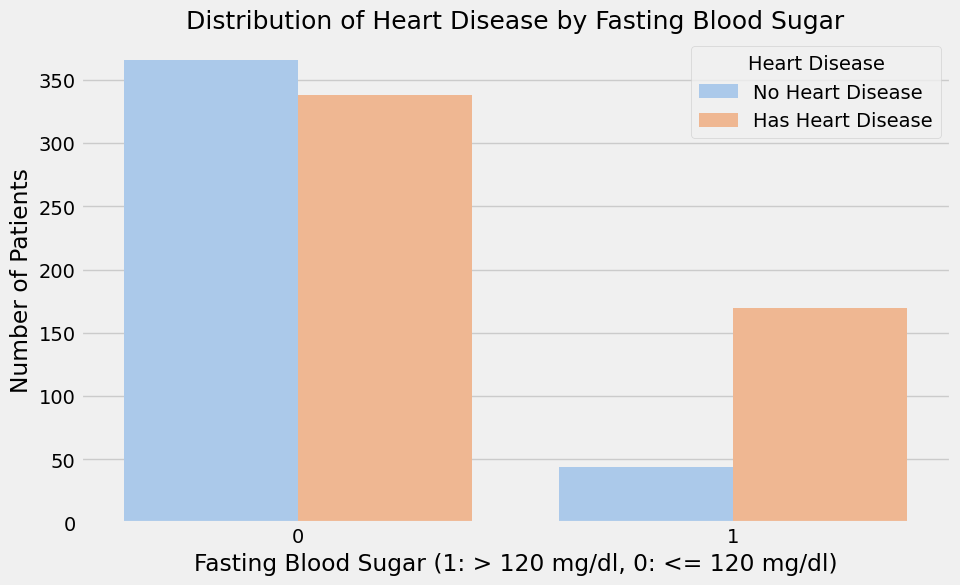

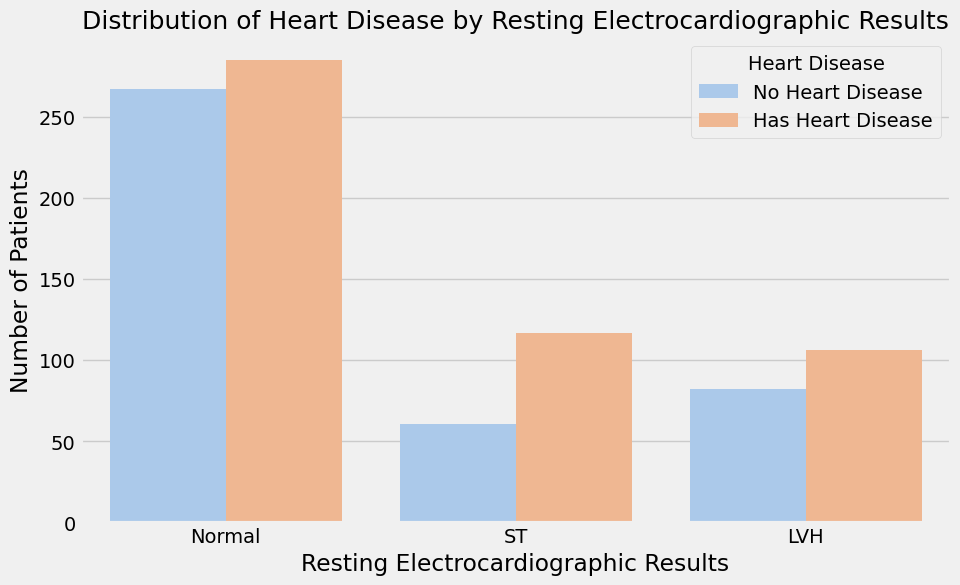

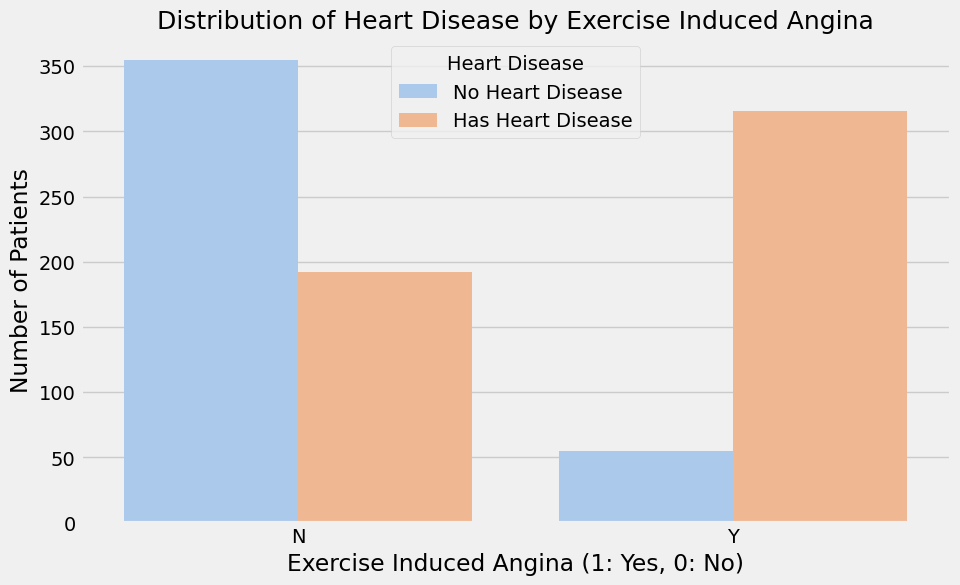

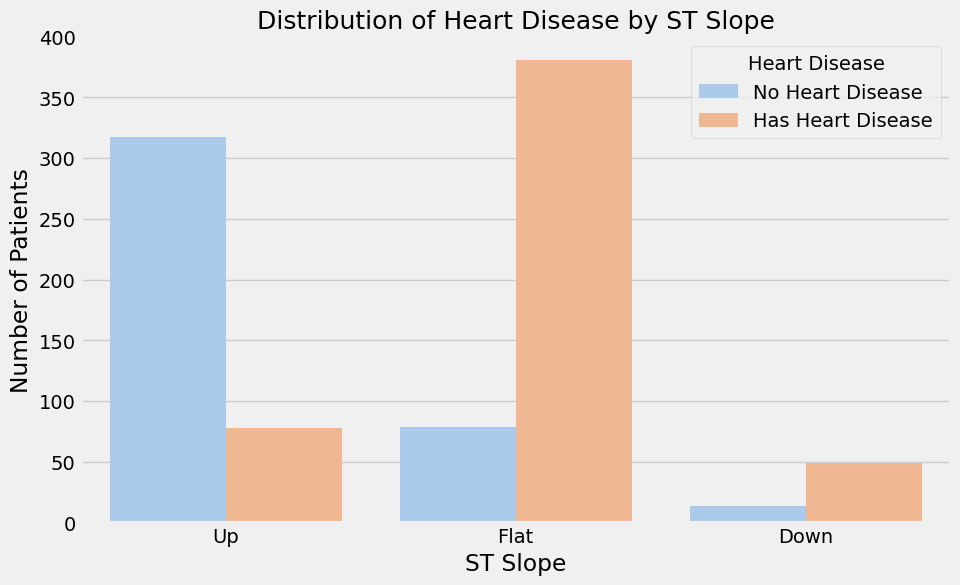

In [62]:
# Analyzing (df) the DataFrame containing your dataset
analysis = AnalyzeData(df)
analysis.analyze()

### __Data Description:__
The Heart Failure Prediction dataset is a collection of clinical and demographic features that was created by combining five heart datasets aimed at predicting the likelihood of heart failure.

#### Features
| Feature                 | Data Type |Description                          |
|----------------------------|-----------|----------------------------------|
| `age`                      | Numeric   | Age of the patient in years.                                        |
| `anaemia`                  | Binary    | Indicates whether the patient has anaemia (0 for no, 1 for yes).    |
| `creatinine_phosphokinase` | Numeric   | Level of creatinine phosphokinase enzyme in the blood (mcg/L).      |
| `diabetes`                 | Binary    | Indicates whether the patient has diabetes (0 for no, 1 for yes).   |
| `ejection_fraction`        | Numeric   | Percentage of blood leaving the heart at each contraction.          |
| `high_blood_pressure`      | Binary    | Indicates whether the patient has high blood pressure (0 for no, 1 for yes). |
| `platelets`                | Numeric   | Platelets count in the blood (kiloplatelets/mL).                    |
| `serum_creatinine`         | Numeric   | Level of serum creatinine in the blood (mg/dL).                     |
| `serum_sodium`             | Numeric   | Level of serum sodium in the blood (mEq/L).                         |
| `sex`                      | Binary    | Gender of the patient (0 for female, 1 for male).                   |
| `smoking`                  | Binary    | Indicates whether the patient is a smoker (0 for no, 1 for yes).    |
| `time`                     | Numeric   | Follow-up period in days.                                          |
| `DEATH_EVENT`              | Binary    | Indicates whether the patient experienced a death

### __Data Source__
The dataset was compiled by Fedesoriano on Kaggle from a set of datasets included datasets that were orginially hosted on the University of California at Irvine's Machine Learning Inventory [click here](https://archive.ics.uci.edu/dataset/45/heart+disease)
####__Sources:__
Janosi,Andras, Steinbrunn,William, Pfisterer,Matthias, and Detrano,Robert. (1988). Heart Disease. UCI Machine Learning Repository. https://doi.org/10.24432/C52P4X.

fedesoriano. (September 2021). Heart Failure Prediction Dataset. Retrieved [September 17, 2023] from https://www.kaggle.com/fedesoriano/heart-failure-prediction.
### Data Visualization

In this section, we used the <code>DatasetPaths</code> class to calculate and display the distributeion of images across different sets and classess within the dataset. The output displays the number of images for each combination of training, testing, and validation sets along with the two class categories: 'NORMAL' and 'PNEUMONIA'. Next, we will create a visualization to get a quick view of the dataset's composition.

__ClassDistributionPlot Class Description__

The <code>ClassDistributionPlot</code> class is a helper class designed to create a bar plot to visualize the distribution of classes across different dataset sets.

__Features:__
* Uses the <code>DatasetPaths</code> class to manage and access dataset paths.
* Accepts a dictionary containing the count of images per class for each dataset set.
* Aligns bars for each class for comparison
* Adopts the <code>fivethirthyeight</code> style for consistency.

__Usage:__
1. Create an instance of the <code>DatasetPaths</code> class.
2. Create an instance of the <code>ClassDistributionPlot</code> class, providing a dictionary with the class distribution data.
3. Use the <code>plot()</code> method to generate bar plots that illustrate class distribution across different sets.

## Evaluation


## Deployment

## Conclusion

## Future Work


### References

International application of a new probability algorithm for the diagnosis of coronary artery disease.
By R. Detrano, A. Jánosi, W. Steinbrunn, M. Pfisterer, J. Schmid, S. Sandhu, K. Guppy, S. Lee, V. Froelicher. 1989

Published in American Journal of Cardiology